In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv("income.csv")

In [4]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


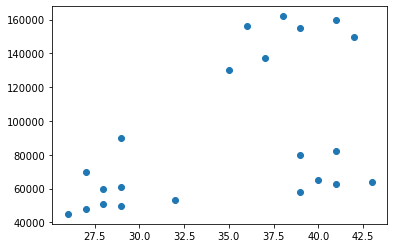

In [6]:
plt.scatter(df.Age,df['Income($)'])

In [7]:
from sklearn.cluster import KMeans

In [9]:
km=KMeans(n_clusters=3)

In [12]:
y_predicted=km.fit_predict(df[['Age']],df[['Income($)']])

In [13]:
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1])

In [14]:
df['clusters']=y_predicted

In [15]:
df.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [17]:
df1=df[df['clusters']==0]
df2=df[df['clusters']==1]
df3=df[df['clusters']==2]

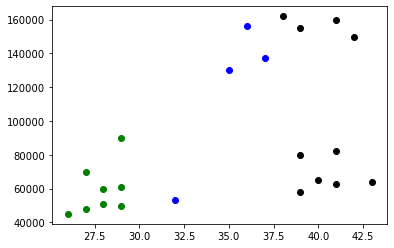

In [18]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='black')
plt.scatter(df3.Age,df3['Income($)'],color='blue')

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scale=MinMaxScaler()

In [23]:
scale.fit(df[['Age']])

MinMaxScaler()

In [24]:
df['Age']=scale.transform(df[['Age']])

In [25]:
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,70000,0
1,Michael,0.176471,90000,0
2,Mohan,0.176471,61000,0
3,Ismail,0.117647,60000,0
4,Kory,0.941176,150000,1


In [26]:
scale.fit(df[['Income($)']])

MinMaxScaler()

In [28]:
df['Income($)']=scale.transform(df[['Income($)']])

In [29]:
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [30]:
df1=df[df['clusters']==0]
df2=df[df['clusters']==1]
df3=df[df['clusters']==2]

In [32]:
df1.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
11,Tom,0.000000,0.000000,0


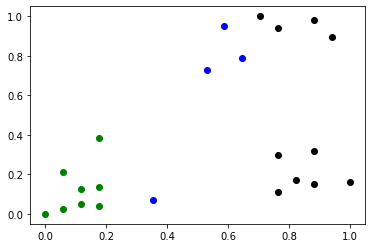

In [33]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='black')
plt.scatter(df3.Age,df3['Income($)'],color='blue')

In [34]:
km=KMeans(n_clusters=3)

In [45]:
y_predict=km.fit_predict(df[['Age','Income($)']])

In [46]:
df['clusters']=y_predict

In [47]:
df

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [48]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

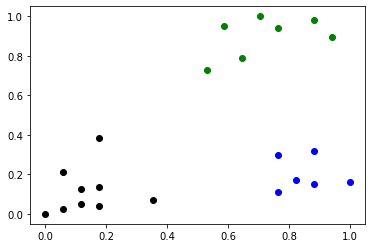

In [49]:
df1=df[df['clusters']==0]
df2=df[df['clusters']==1]
df3=df[df['clusters']==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='black')
plt.scatter(df3.Age,df3['Income($)'],color='blue')

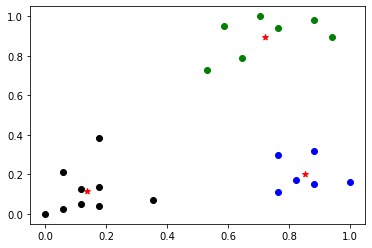

In [51]:
df1=df[df['clusters']==0]
df2=df[df['clusters']==1]
df3=df[df['clusters']==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='black')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], marker="*",color='red')

In [54]:
k_rng=range(1,10)
see=[]
for k in  k_rng:
    km=KMeans(n_clusters=k)
    km.fit_predict(df[['Age','Income($)']])
    see.append(km.inertia_)

C:\Users\839491\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [55]:
see

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2766936276300279,
 0.21055478995472496,
 0.1685851223602976,
 0.13717729016208893,
 0.10383752586603562]

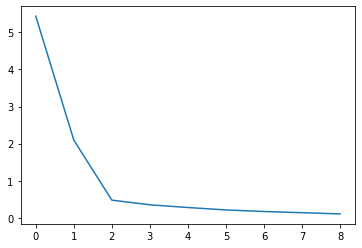

In [56]:
plt.plot(see)